In [33]:
'''
ORDER
1. Collecting data
2. Analyzing data
3. Data cleaning AKA Data wrangling
4. Train & test
5. Accuracy test
'''

# 1. Collecting data
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

url = 'datasets/titanic_null.csv'
dataset = pd.read_csv(url)
print(dataset.shape)
dataset.head()

(887, 10)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Unnamed: 8,Unnamed: 9
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,NaN,NaN
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,NaN,NaN
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,NaN,NaN
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,NaN,NaN
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,NaN,NaN


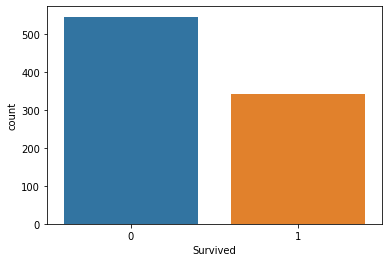

In [34]:
# 2. Analyzing data
# Create different plots among variables

# How many survived and how many not
sns.countplot(x='Survived', data=dataset)

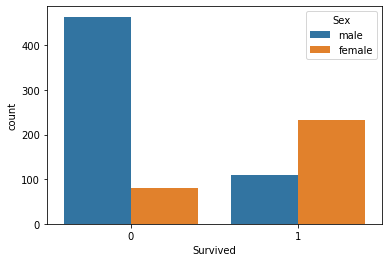

In [35]:
# Among survived passengers how many were men and how many were women
sns.countplot(x='Survived', hue='Sex', data=dataset)

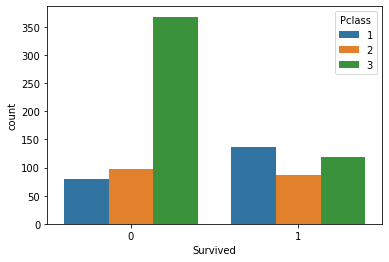

In [36]:
# How classes affect to survived passengers
sns.countplot(x='Survived', hue='Pclass', data=dataset)

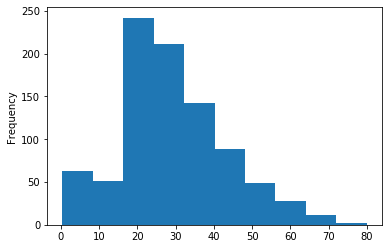

In [37]:
# Age distrubution among passengers
dataset['Age'].plot.hist()

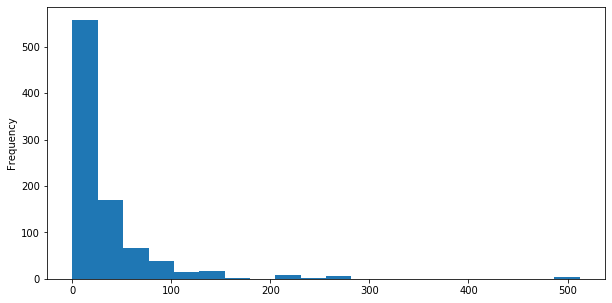

In [38]:
# Fares distribution among passengers
dataset['Fare'].plot.hist(bins=20, figsize=(10,5))

In [39]:
# In order to analyze more data, Let's see what are the other columns left
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Unnamed: 8                 0 non-null float64
Unnamed: 9                 0 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.4+ KB


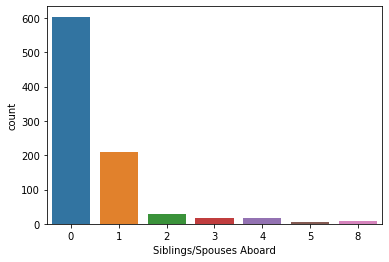

In [40]:
# Siblings/Spouses Aboard distribution among passengers
sns.countplot(x='Siblings/Spouses Aboard', data=dataset)

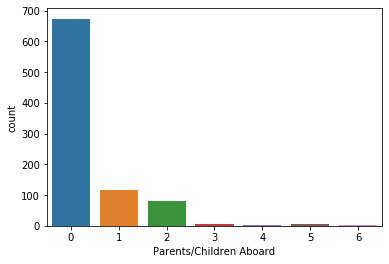

In [41]:
# Parents/Children Aboard distribution among passengers
sns.countplot(x='Parents/Children Aboard', data=dataset)

In [42]:
# 3. Data cleaning
# Since I got the dataset from kaggle it's already removed most unnessasary data
# Let's add some null values to dataset and call it again

# Check whether there's any null values in data
dataset.isnull()
# False = Not Null, True = Null

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Unnamed: 8,Unnamed: 9
0,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False,True,True
883,False,False,False,False,False,False,False,False,True,True
884,False,False,False,False,False,False,False,False,True,True
885,False,False,False,False,False,False,False,False,True,True


In [43]:
# Check SUM of null data
dataset.isnull().sum()

Survived                     0
Pclass                       0
Name                         0
Sex                          0
Age                          0
Siblings/Spouses Aboard      0
Parents/Children Aboard      0
Fare                         0
Unnamed: 8                 887
Unnamed: 9                 887
dtype: int64

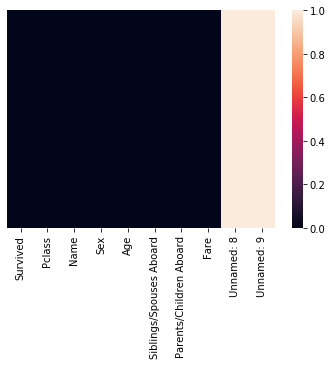

In [50]:
# Visually analyze null data using heatmap
sns.heatmap(dataset.isnull(), yticklabels=False) # We don't need lables in y-axis